# Linear Regression Model - CDA2/2Da

In [1]:
import pandas as pd
import numpy as np

In [2]:
def import_swiss_votes_data(filepath):
    """
    Import Swiss votes data from a CSV file.
    
    Parameters:
    filepath (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: dataframe with a subselect of csv data
    """
    
    # Import the CSV data
    # The data doesn't have headers and uses semicolons as separators
    df = pd.read_csv(filepath, sep=';')
    
    # Based on the data structure, we can create appropriate column names
    # This is a simplified set of column names based on the visible patterns
    columns_to_use = [
        'anr', 'datum', 'titel_kurz_d', 'titel_off_d', 'stichwort', 'swissvoteslink', 'rechtsform', 'd1e1', 'd1e2', 'd1e3', 
        'dep', 'br-pos', 'bv-pos', 'nr-pos', 'sr-pos', 'annahme', 'berecht', 'stimmen', 'bet', 'leer', 'ungultig', 'gultig', 'volkja',
        'volknein', 'volkja-proz', 'bfsdash-de', 'bfsmap-de', 'nach_cockpit_d',

        # Kantonale Parameter
        'zh-ja', 'be-ja', 'zg-ja', 'so-ja', 'ag-ja', 'ti-ja', 'vs-ja', 'bs-ja', 'bl-ja',
        'ju-ja', 'ne-ja', 'ow-ja', 'nw-ja', 'ai-ja', 'sg-ja', 'tg-ja', 'ar-ja', 'gl-ja',
        'gr-ja', 'sh-ja', 'vd-ja', 'ge-ja', 'fr-ja', 'ur-ja', 'lu-ja', 'sz-ja',

        'zh-nein', 'be-nein', 'zg-nein', 'so-nein', 'ag-nein', 'ti-nein', 'vs-nein', 'bs-nein', 'bl-nein',
        'ju-nein', 'ne-nein', 'ow-nein', 'nw-nein', 'ai-nein', 'sg-nein', 'tg-nein', 'ar-nein', 'gl-nein',
        'gr-nein', 'sh-nein', 'vd-nein', 'ge-nein', 'fr-nein', 'ur-nein', 'lu-nein', 'sz-nein',

        'zh-stimmen', 'be-stimmen', 'zg-stimmen', 'so-stimmen', 'ag-stimmen', 'ti-stimmen', 'vs-stimmen', 'bs-stimmen', 'bl-stimmen',
        'ju-stimmen', 'ne-stimmen', 'ow-stimmen', 'nw-stimmen', 'ai-stimmen', 'sg-stimmen', 'tg-stimmen', 'ar-stimmen', 'gl-stimmen',
        'gr-stimmen', 'sh-stimmen', 'vd-stimmen', 'ge-stimmen', 'fr-stimmen', 'ur-stimmen', 'lu-stimmen', 'sz-stimmen',

        'zh-japroz', 'be-japroz', 'zg-japroz', 'so-japroz', 'ag-japroz', 'ti-japroz', 'vs-japroz', 'bs-japroz', 'bl-japroz',
        'ju-japroz', 'ne-japroz', 'ow-japroz', 'nw-japroz', 'ai-japroz', 'sg-japroz', 'tg-japroz', 'ar-japroz', 'gl-japroz',
        'gr-japroz', 'sh-japroz', 'vd-japroz', 'ge-japroz', 'fr-japroz', 'ur-japroz', 'lu-japroz', 'sz-japroz',
    ]
    # srja, srnein, nrja, nrnein
    # Parteiparolen könnten spannend sein, p-fdp, p-sps, p-svp, p-mitte, etc.

    df_subset = df[columns_to_use]
    
    print(f"Cleaned data: {df.shape[0]} rows, {df.shape[1]} columns")
    return df_subset

swissvotes_data_path = '../data/raw/swissvotes_data.csv'

swissvotes_data_subset = import_swiss_votes_data(swissvotes_data_path)

Cleaned data: 696 rows, 874 columns


In [3]:
def clean_and_prepare_data(df_to_clean):
    
    # 1. Convert date to datetime format
    # Transform dates from DD.MM.YYYY to YYYY-MM-DD format
    df_to_clean['datum'] = pd.to_datetime(df_to_clean['datum'], format='%d.%m.%Y', errors='coerce')
    
    # 2. Replace placeholder values with NaN
    # In the data, '.' is used as unknown and '9999' appears to be not applicable (organisation doesn't exist)
    # We will be replaceing all these values with nan
    placeholder_values = ['.', '9999', '']
    for placeholder in placeholder_values:
        df_to_clean.replace(placeholder, np.nan, inplace=True)
    
    # 3. Convert boolean-like columns (0/1) to boolean
    boolean_cols = [col for col in df_to_clean.columns if 
                    df_to_clean[col].dropna().astype(str).str.match(r'^[01]$').all()]
    
    for col in boolean_cols:
        df_to_clean[col] = df_to_clean[col].map({0: False, '0': False, 1: True, '1': True})
    
    # 4. Strip whitespace from string columns
    string_cols = df_to_clean.select_dtypes(include=['object']).columns
    for col in string_cols:
        df_to_clean[col] = df_to_clean[col].astype(str).str.strip()
        # Convert back to object type if the column had empty strings that were converted to 'nan'
        df_to_clean[col] = df_to_clean[col].replace('nan', np.nan)
    
    # 6. Handle URLs - validate and clean
    url_cols = [col for col in df_to_clean.columns if 'url' in col.lower()]
    for col in url_cols:
        if col in df_to_clean.columns:
            # Basic URL validation - ensure URLs start with http
            mask = df_to_clean[col].notna() & ~df_to_clean[col].astype(str).str.startswith(('http://', 'https://'))
            if mask.any():
                print(f"Warning: Found {mask.sum()} invalid URLs in column {col}")
                
    # 7. Remove completely empty rows
    df_to_clean = df_to_clean.dropna(how='all')
    
    # 8. Handle trailing semicolons that might have created extra empty columns
    # Drop columns that are completely empty
    df_to_clean = df_to_clean.dropna(axis=1, how='all')
    
    return df_to_clean

In [4]:
swissvotes_data_subset_cleaned = clean_and_prepare_data(swissvotes_data_subset)

swissvotes_data_subset_cleaned.head()

,anr,datum,titel_kurz_d,titel_off_d,stichwort,swissvoteslink,rechtsform,d1e1,d1e2,d1e3,...,ar-japroz,gl-japroz,gr-japroz,sh-japroz,vd-japroz,ge-japroz,fr-japroz,ur-japroz,lu-japroz,sz-japroz
0,1.0,1848-09-12,Bundesverfassung der schweizerischen Eidgenoss...,Totalrevision vom 12. September 1848,NaN,https://swissvotes.ch/vote/1.00,1,1,1.2,1.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1866-01-14,Mass und Gewicht,Festsetzung von Mass und Gewicht,NaN,https://swissvotes.ch/vote/2.00,1,1,1.5,1.52,...,24.85,30.85,5.62,40.33,66.56,87.64,58.26,13.53,19.64,24.60
2,3.0,1866-01-14,Gleichstellung der Juden und Naturalisierten m...,Gleichstellung der Juden und Naturalisierten m...,NaN,https://swissvotes.ch/vote/3.00,1,12,12.3,NaN,...,44.23,67.74,10.35,53.30,62.70,85.95,56.79,6.05,19.40,22.27
3,4.0,1866-01-14,Stimmrecht der Niedergelassenen in Gemeindeang...,Stimmrecht der Niedergelassenen in Gemeindeang...,NaN,https://swissvotes.ch/vote/4.00,1,1,1.4,1.43,...,46.01,55.78,9.89,46.42,10.65,37.97,20.44,5.88,19.28,20.47
4,5.0,1866-01-14,Besteuerung und zivilrechtliche Verhältnisse d...,Besteuerung und zivilrechtliche Verhältnisse d...,NaN,https://swissvotes.ch/vote/5.00,1,6,6.1,6.12,...,3.48,64.30,10.45,46.67,6.79,58.28,19.40,5.98,15.95,15.64


## Importieren und Vorbereitung der Daten der Religionszugehörigkeit

In [5]:
# === 1. CSV-Datei laden (korrekter Pfad & Komma als Trennzeichen) ===
file_path = '../data/raw/rel_gemeinde.csv'
df = pd.read_csv(file_path, sep=",", encoding="utf-8")

#--Wrangling
# === 2. Leere/unnötige Spalten entfernen ===
df = df.loc[:, ~df.columns.str.match(r"^Unnamed")]

# === 3. In Long-Format bringen ===
id_vars = ['Regions_ID', 'Regionsname', 'Kanton']
value_vars = [col for col in df.columns if col.startswith("y_")]

df_long = pd.melt(df,
                  id_vars=id_vars,
                  value_vars=value_vars,
                  var_name="Jahr",
                  value_name="Religion")

# === 4. Jahr bereinigen (z. B. y_1850 → 1850 als int) ===
df_long["Jahr"] = df_long["Jahr"].str.extract(r"y_(\d+)").astype(int)

# === 5. Encoding-Fehler beheben (‚â• → ≥) ===
df_long["Religion"] = df_long["Religion"].str.replace("‚â•", "≥", regex=False)

# === 6. Nur gültige Kantone (z. B. ZH, BE, AG etc.) ===
df_long["Kanton"] = df_long["Kanton"].astype(str).str.strip()
df_long = df_long[df_long["Kanton"].str.match(r"^[A-Z]{2}$")]

# === 7. Aggregation: häufigste Religion pro Kanton & Jahr ===
df_kanton_agg = (
    df_long
    .groupby(["Kanton", "Jahr"])["Religion"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index()
)

print(df_kanton_agg['Jahr'].unique())

[1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980
 1990 2000 2014]


In [6]:
print(df_kanton_agg['Religion'].unique())

['Mehrheit katholisch: ≥ 80,0 %' 'Mehrheit Katholisch: ≥ 80,0 %'
 'Mehrheit reformiert: ≥ 80,0 %' 'Mehrheit reformiert: 60,0 - 79,9 %'
 'Mehrheit katholisch: 60,0 - 79,9 %' 'Mehrheit katholisch: 40,0 - 59,9 %'
 'Mehrheit Reformiert: ≥ 80,0 %' 'Mehrheit reformiert: 40,0 - 59,9 %'
 'Mehrheit mit anderer oder ohne Religionszugehörigkeit: 40,0 - 59,9 %'
 None]


## Prepare and Combine Data frames

### Data Frames
Wir testen zwei verschiedene Modelle:
– Dummy-Werte als Werte für die lineare Regression.
– eine Skalarwerteskala von -1 bis 1. 1 steht für eine hohe protestantische und -1 für eine hohe katholische Zugehörigkeit.

### Daten

Wir werden alle Abstimmungen verwenden, die als Wirtschaftsabstimmungen klassifiziert wurden auf Swissvotes

Siehe [Swissvotes](https://swissvotes.ch/votes?term=&full_text=1&policy_area=4&legal_form=1&legal_form=2&legal_form=3&legal_form=4&legal_form=5&result=0&result=1&from_date=&to_date=&position_federal_council=1&position_federal_council=2&position_federal_council=3&position_federal_council=-1&position_national_council=1&position_national_council=2&position_national_council=3&position_council_of_states=1&position_council_of_states=2&position_council_of_states=3&sort_by=&sort_order=)

In [7]:
# Prepare the data with all the necessary 

# List of anr (Abstimmungsnummer) for all votes that are in the used for the training, crossvalidation and testing of the model.
economic_votes_ids = [677, 663, 662, 661, 655, 654, 653, 652, 650, 648,
                      643, 637, 636, 634, 627, 619, 618, 611, 601, 598,
                      589, 585, 583, 575, 574, 568, 565, 559, 558, 557,
                      555, 531, 530, 523, 521, 519, 503, 489.2, 489.1, 
                      486, 448, 436, 433, 424, 396, 390, 388, 386, 352,
                      335, 329, 319, 311.2, 311.1, 310, 307, 305, 294,
                      282, 264, 263, 262, 255.2, 255.1, 247, 246, 240,
                      239, 238, 237, 233, 230, 229, 220, 210, 209, 208,
                      198, 188, 186, 184, 177, 175, 174.1, 174.2, 170,
                      165, 163, 158, 156.2, 156.1, 155, 146, 143, 142,
                      141, 140, 137, 131, 126.2, 126.1, 121, 120, 106,
                      98, 84, 82.2, 82.1, 81, 67, 65, 64, 60, 52, 50,
                      45, 42, 41, 38, 37, 33, 32, 27, 23, 22, 17, 15,
                      10, 9]

# Subselect of economic votes based on the ids
df_full_model_data = swissvotes_data_subset_cleaned[swissvotes_data_subset_cleaned["anr"].isin(economic_votes_ids)]

df_full_model_data.head()

,anr,datum,titel_kurz_d,titel_off_d,stichwort,swissvoteslink,rechtsform,d1e1,d1e2,d1e3,...,ar-japroz,gl-japroz,gr-japroz,sh-japroz,vd-japroz,ge-japroz,fr-japroz,ur-japroz,lu-japroz,sz-japroz
8,9.0,1866-01-14,Schutz des geistigen Eigentums,Schutz des geistigen Eigentums,NaN,https://swissvotes.ch/vote/9.00,1,4,4.1,4.12,...,40.38,65.48,8.12,47.00,10.89,69.05,46.50,16.21,19.20,27.27
9,10.0,1866-01-14,Verbot der Lotterie und Hasardspiele,Verbot der Lotterie und Hasardspiele,NaN,https://swissvotes.ch/vote/10.00,1,4,4.1,4.13,...,41.51,78.66,11.04,48.20,14.19,75.71,21.27,10.76,21.76,23.06
14,15.0,1876-04-23,Banknotengesetz,Bundesgesez über die Ausgabe und Einlösung von...,NaN,https://swissvotes.ch/vote/15.00,2,4,4.3,4.31,...,53.66,59.58,9.39,38.02,51.38,8.55,63.87,11.16,11.03,61.87
16,17.0,1877-10-21,Fabrikgesetz,Bundesgesez betreffend die Arbeit in den Fabriken,NaN,https://swissvotes.ch/vote/17.00,2,4,4.2,4.21,...,28.04,66.78,78.52,72.97,29.05,43.28,18.50,70.34,59.81,75.10
21,22.0,1880-10-31,Banknotenmonopol,Bundesbeschluss betreffend den durch das Volks...,NaN,https://swissvotes.ch/vote/22.00,1,4,4.3,4.31,...,30.28,68.77,65.32,66.48,1.66,5.30,3.17,36.54,19.26,17.45


 ### Prepare the data frame for the lin. reg. models

In [8]:
import re

# Function to convert religious affiliation to a continuous value
def religion_to_continuous(religion_str):
    if pd.isna(religion_str):
        return 0  # Neutral rating for unknown religious affiliation
    
    # Extract the type of religion (Catholic/Reformed) and the percentage
    if 'katholisch' in religion_str.lower():
        orientation = -1  # Catholic as negative values
    elif 'reformiert' in religion_str.lower():
        orientation = 1   # Reformed as positive values
    elif 'anderer oder ohne Religionszugehörigkeit' in religion_str.lower():
        return 0 # return 0 when there is another or no religious belonging
    else:
        return 0  # Neutral rating for other or no religious affiliation
    
    # Extract the percentage from the string
    percentage_match = re.search(r'(\d+[\.,]?\d*)\s*%', religion_str)
    if percentage_match:
        # If a single percentage is specified
        percentage = float(percentage_match.group(1).replace(',', '.'))
        strength = percentage / 100.0
    else:
        # If a percentage range is specified (e.g., "60.0 - 79.9 %")
        range_match = re.search(r'(\d+[\.,]?\d*)\s*-\s*(\d+[\.,]?\d*)\s*%', religion_str)
        if range_match:
            lower = float(range_match.group(1).replace(',', '.'))
            upper = float(range_match.group(2).replace(',', '.'))
            percentage = (lower + upper) / 2  # Average of the range
            strength = percentage / 100.0
        else:
            strength = 0.5  # Default value if no percentage is found
    
    # Calculate the continuous value (between -1 and 1)
    return orientation * strength

df_kanton_agg['religion_continuous'] = df_kanton_agg['Religion'].apply(religion_to_continuous)

print(df_kanton_agg)

    Kanton  Jahr                            Religion  religion_continuous
0       AG  1850       Mehrheit katholisch: ≥ 80,0 %               -0.800
1       AG  1860       Mehrheit katholisch: ≥ 80,0 %               -0.800
2       AG  1870       Mehrheit katholisch: ≥ 80,0 %               -0.800
3       AG  1880       Mehrheit katholisch: ≥ 80,0 %               -0.800
4       AG  1890       Mehrheit Katholisch: ≥ 80,0 %               -0.800
..     ...   ...                                 ...                  ...
437     ZH  1970  Mehrheit reformiert: 60,0 - 79,9 %                0.799
438     ZH  1980  Mehrheit reformiert: 60,0 - 79,9 %                0.799
439     ZH  1990  Mehrheit reformiert: 40,0 - 59,9 %                0.599
440     ZH  2000  Mehrheit reformiert: 40,0 - 59,9 %                0.599
441     ZH  2014  Mehrheit reformiert: 40,0 - 59,9 %                0.599

[442 rows x 4 columns]


In [9]:
df_lin_reg_continuous_eco_votes = df_full_model_data

df_lin_reg_continuous_eco_votes['jahr'] = df_lin_reg_continuous_eco_votes['datum'].dt.year

votes = []

for id, vote in df_lin_reg_continuous_eco_votes.iterrows():
    # overall result vote
    vote_yes_percentage_overall_ch = float(vote['volkja-proz'])

    reference_years = df_kanton_agg['Jahr'].unique()

    # Find the index of the nearest laying value
    idx = np.abs(reference_years - vote['jahr']).argmin()
    # get the year used for the political data
    religion_reference_year = reference_years[idx]

    # Get the religion information from the specified reference year
    df_kantons_reference_year = df_kanton_agg[df_kanton_agg['Jahr'] == religion_reference_year]
    
    # For each canton, check if it already existed at the time of the vote
    existing_cantons = df_kantons_reference_year[df_kantons_reference_year['Religion'].notna()]

    for idx, canton in existing_cantons.iterrows():
        
        canton_religion = canton['religion_continuous']

        canton_abbreviation = canton['Kanton'].lower()

        yes_percentage_canton = vote[f'{canton_abbreviation}-japroz']

        votes.append({
            'vote_id': id,
            'voting_year': vote['jahr'],
            'canton': canton_abbreviation,
            'yes_percentage': yes_percentage_canton
        })
        
    votes.append({
        'vote_id': id,
        'voting_year': vote['jahr'],
        'canton': 'Schweiz_Gesamt',
        'yes_percentage': vote_yes_percentage_overall_ch
    })
    
votes_df = pd.DataFrame(votes)

votes_df.head()

C:\Users\aaron\AppData\Local\Temp\ipykernel_33940\4177205352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lin_reg_continuous_eco_votes['jahr'] = df_lin_reg_continuous_eco_votes['datum'].dt.year


,vote_id,voting_year,canton,yes_percentage
0,8,1866,ag,56.15
1,8,1866,ai,1.59
2,8,1866,ar,40.38
3,8,1866,be,37.19
4,8,1866,bl,58.82


In [10]:
# ------ Restructuring the data for modeling ------

# 1. Extract the overall results for Switzerland as the target variable
switzerland_overall = votes_df[votes_df['canton'] == 'Schweiz_Gesamt'].copy()
switzerland_overall['yes_percentage'] = switzerland_overall['yes_percentage'] / 100.0  # Normalize to 0-1
switzerland_overall['accepted'] = (switzerland_overall['yes_percentage'] >= 50).astype(int)  # Binary acceptance variable

# 2. Remove the overall Swiss results from the voting data
cantonal_data = votes_df[votes_df['canton'] != 'Schweiz_Gesamt'].copy()

# 3. For each vote: Create features based on the religious profiles of the cantons
vote_features = []

for vote_id in cantonal_data['vote_id'].unique():
    # Data for this vote
    vote_data = cantonal_data[cantonal_data['vote_id'] == vote_id]
    voting_year = vote_data['voting_year'].iloc[0]
    
    # Create feature row for this vote
    feature_row = {'vote_id': vote_id, 'voting_year': voting_year}
    
    # Count cantons by religious affiliation
    religion_counts = {}
    religion_continuous_avg = 0
    existing_cantons = 0

    # Find the index of the nearest laying value
    idx = np.abs(reference_years - vote_data['voting_year'].unique()).argmin()
    # get the year used for the political data
    religion_reference_year = reference_years[idx]

    # Get the religion information from the specified reference year
    df_kantons_reference_year = df_kanton_agg[df_kanton_agg['Jahr'] == religion_reference_year]
    
    # For each canton, check if it already existed at the time of the vote
    available_cantons = df_kantons_reference_year[df_kantons_reference_year['Religion'].notna()]
    
    # For each canton that participated in the vote
    for id, canton in available_cantons.iterrows():
        religion = canton['Religion']
        religion_continuous = canton['religion_continuous']
        
        # Count the religion categories
        if religion not in religion_counts:
            religion_counts[religion] = 0
        religion_counts[religion] += 1
        
        # Add the continuous religion value for this canton
        feature_row[f'religion_{canton['Kanton']}'] = religion_continuous
        religion_continuous_avg += religion_continuous
        existing_cantons += 1
    
    # Calculate the average continuous religion value
    if existing_cantons:
        feature_row['religion_continuous_avg'] = religion_continuous_avg / existing_cantons
    else:
        feature_row['religion_continuous_avg'] = 0
    
    # Add the number of cantons by religious category
    for religion, count in religion_counts.items():
        feature_row[f'count_{religion}'] = count

    # Add the number of existing cantons
    feature_row['num_cantone'] = existing_cantons
    
    vote_features.append(feature_row)

# Create DataFrame with features per vote
vote_features_df = pd.DataFrame(vote_features)

# 4. Connect the features with the target variables
model_data = pd.merge(vote_features_df, switzerland_overall[['vote_id', 'yes_percentage', 'accepted']], on='vote_id')

model_data.head()

,vote_id,voting_year,religion_AG,religion_AI,religion_AR,religion_BE,religion_BL,religion_BS,religion_FR,religion_GE,...,"count_Mehrheit Katholisch: ≥ 80,0 %","count_Mehrheit Reformiert: ≥ 80,0 %","count_Mehrheit reformiert: 60,0 - 79,9 %","count_Mehrheit katholisch: 60,0 - 79,9 %","count_Mehrheit katholisch: 40,0 - 59,9 %","count_Mehrheit reformiert: 40,0 - 59,9 %",religion_JU,"count_Mehrheit mit anderer oder ohne Religionszugehörigkeit: 40,0 - 59,9 %",yes_percentage,accepted
0,8,1866,-0.8,-0.8,0.8,0.8,0.8,0.8,-0.8,-0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4366,0
1,9,1866,-0.8,-0.8,0.8,0.8,0.8,0.8,-0.8,-0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4403,0
2,14,1876,-0.8,-0.8,0.8,0.8,0.8,0.8,-0.8,-0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3832,0
3,16,1877,-0.8,-0.8,0.8,0.8,0.8,0.8,-0.8,-0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5147,0
4,21,1880,-0.8,-0.8,0.8,0.8,0.8,0.8,-0.8,-0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3177,0


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### Model 1 - Kategorische features

In [12]:
# ------ Model 1: Categorical Model ------
# Here we use the number of cantons per religious category

# Identify columns that begin with "count_" (religion categories)
count_cols = [col for col in model_data.columns if col.startswith('count_')]

# Define feature columns for Model 1
X1_cols = ['num_cantone'] + count_cols
X1 = model_data[X1_cols].fillna(0)  # Fill missing values with 0
y = model_data['yes_percentage']  # Target variable: Yes-share

# Split data into training and test sets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Train linear regression model
model1 = LinearRegression()
model1.fit(X1_train, y_train)

# Evaluate the model
y_pred1 = model1.predict(X1_test)
y_pred1_clipped = np.clip(y_pred1, 0, 1)  # Limit predictions to [0,1]
mse1 = mean_squared_error(y_test, y_pred1_clipped)
r2_1 = r2_score(y_test, y_pred1_clipped)

print("Model 1 (Categorical Model):")
print(f"Mean Squared Error: {mse1:.4f}")
print(f"R²-Score: {r2_1:.4f}")

# Analyze coefficients
coefs1 = pd.DataFrame({'Feature': X1_cols, 'Coefficient': model1.coef_})
print("\nCoefficients of Model 1:")
print(coefs1)

Model 1 (Categorical Model):
Mean Squared Error: 0.0328
R²-Score: -0.0482

Coefficients of Model 1:
                                             Feature  Coefficient
0                                        num_cantone     0.013022
1                count_Mehrheit katholisch: ≥ 80,0 %    -0.031112
2                count_Mehrheit reformiert: ≥ 80,0 %    -0.053760
3                count_Mehrheit Katholisch: ≥ 80,0 %    -0.044202
4                count_Mehrheit Reformiert: ≥ 80,0 %    -0.031573
5           count_Mehrheit reformiert: 60,0 - 79,9 %    -0.007828
6           count_Mehrheit katholisch: 60,0 - 79,9 %    -0.098927
7           count_Mehrheit katholisch: 40,0 - 59,9 %    -0.096959
8           count_Mehrheit reformiert: 40,0 - 59,9 %    -0.011200
9  count_Mehrheit mit anderer oder ohne Religions...     0.388582


### Model 2 - Continuous features

In [13]:
# ------ Model 2: Continuous Model ------
# Here we use the continuous religion value and the average value

X2_cols = ['religion_continuous_avg', 'religion_AG', 'religion_AI', 'religion_AR', 'religion_BE', 'religion_BL', 'religion_BS', 'religion_FR', 'religion_GE', 'religion_ZH', 'religion_ZG',
          'religion_SO', 'religion_TI', 'religion_VS', 'religion_NE', 'religion_OW', 'religion_NW', 'religion_SG', 'religion_TG', 'religion_GR', 'religion_SH', 'religion_VD',
          'religion_UR', 'religion_LU', 'religion_SZ']

X2 = model_data[X2_cols].fillna(0)  # Fill missing values with 0

# Split data into training and test sets
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Train linear regression model
model2 = LinearRegression()
model2.fit(X2_train, y_train)

# Evaluate the model
y_pred2 = model2.predict(X2_test)
y_pred2_clipped = np.clip(y_pred2, 0, 1)  # Limit predictions to [0,1]
mse2 = mean_squared_error(y_test, y_pred2_clipped)
r2_2 = r2_score(y_test, y_pred2_clipped)

print("\nModel 2 (Continuous Model):")
print(f"Mean Squared Error: {mse2:.4f}")
print(f"R²-Score: {r2_2:.4f}")

# Analyze coefficients
coefs2 = pd.DataFrame({'Feature': X2_cols, 'Coefficient': model2.coef_})
print("\nCoefficients of Model 2:")
print(coefs2)


Model 2 (Continuous Model):
Mean Squared Error: 0.0265
R²-Score: 0.1521

Coefficients of Model 2:
                    Feature   Coefficient
0   religion_continuous_avg -6.593725e-01
1               religion_AG -6.465037e-02
2               religion_AI -4.163943e-02
3               religion_AR  4.890181e+01
4               religion_BE  4.163943e-02
5               religion_BL  2.445096e-01
6               religion_BS  1.380308e+00
7               religion_FR -4.163943e-02
8               religion_GE  8.182381e-02
9               religion_ZH  4.890181e+01
10              religion_ZG -1.000509e-01
11              religion_SO -2.011024e+01
12              religion_TI -4.163943e-02
13              religion_VS -4.190288e-21
14              religion_NE -2.046380e+01
15              religion_OW -4.190288e-21
16              religion_NW -4.163943e-02
17              religion_SG -8.427937e+00
18              religion_TG -1.178908e+02
19              religion_GR -1.725314e-01
20              rel

### Visualizations

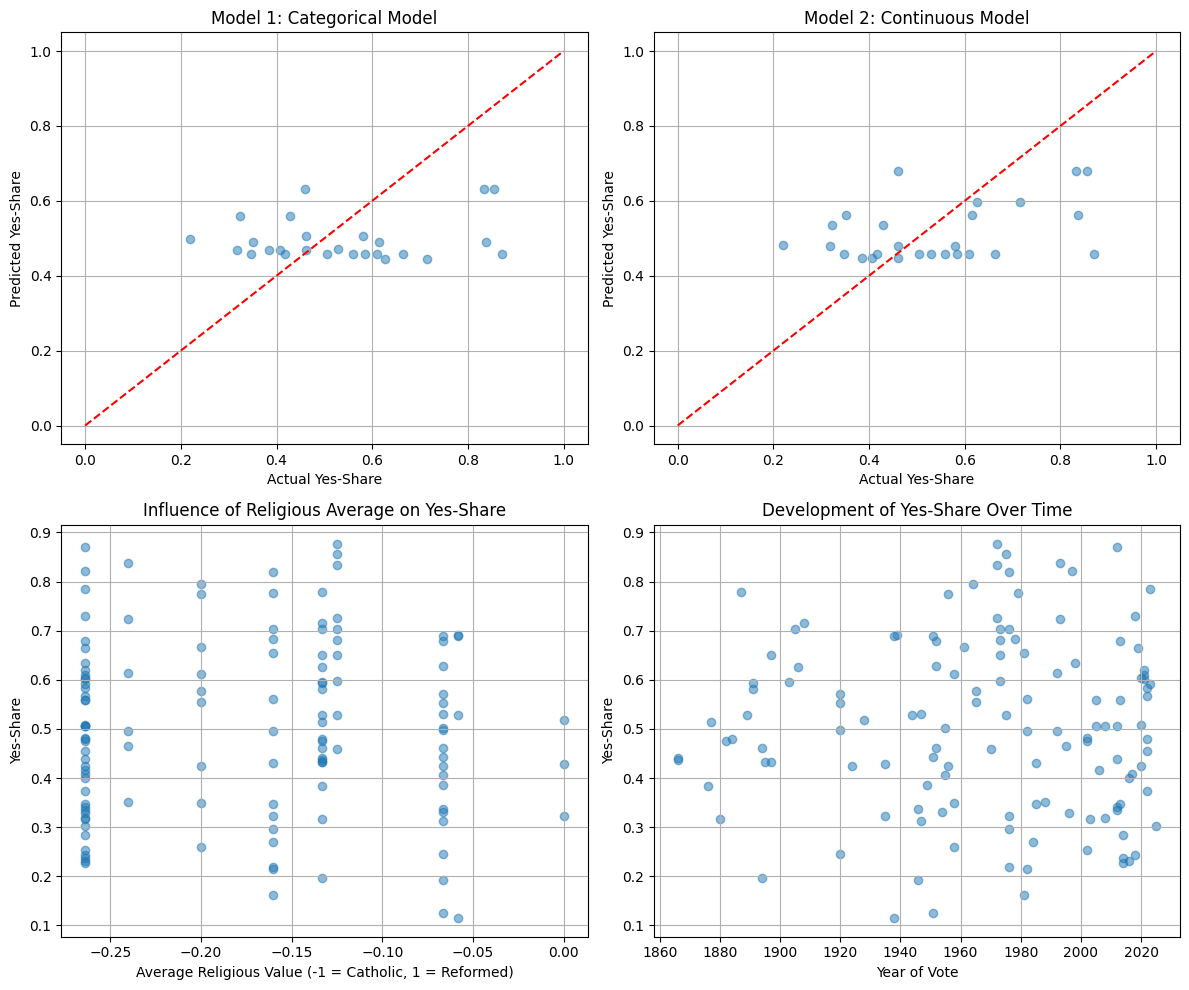

In [14]:
# ------ Visualization ------
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Model 1: Visualization of predictions
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred1_clipped, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual Yes-Share')
plt.ylabel('Predicted Yes-Share')
plt.title('Model 1: Categorical Model')
plt.grid(True)

# Model 2: Visualization of predictions
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred2_clipped, alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual Yes-Share')
plt.ylabel('Predicted Yes-Share')
plt.title('Model 2: Continuous Model')
plt.grid(True)

# Influence of the average continuous religious value on the yes-share
plt.subplot(2, 2, 3)
plt.scatter(model_data['religion_continuous_avg'], model_data['yes_percentage'], alpha=0.5)
plt.xlabel('Average Religious Value (-1 = Catholic, 1 = Reformed)')
plt.ylabel('Yes-Share')
plt.title('Influence of Religious Average on Yes-Share')
plt.grid(True)

# Development of the yes-share over time
plt.subplot(2, 2, 4)
plt.scatter(model_data['voting_year'], model_data['yes_percentage'], alpha=0.5)
plt.xlabel('Year of Vote')
plt.ylabel('Yes-Share')
plt.title('Development of Yes-Share Over Time')
plt.grid(True)

plt.tight_layout()
plt.savefig('voting_model_analysis.png')

In [15]:
# ------ helper function to get all continuous values for all cantons

def get_continuous_values_for_cantons(current_cantons):
    # Calculate the average continuous religion value
    religion_continuous_avg = current_cantons['religion_continuous'].mean()

    religion_AG_continuous = current_cantons[current_cantons['Kanton'] == 'AG']['religion_continuous'].values[0]
    religion_AI_continuous = current_cantons[current_cantons['Kanton'] == 'AI']['religion_continuous'].values[0]
    religion_AR_continuous = current_cantons[current_cantons['Kanton'] == 'AR']['religion_continuous'].values[0]
    religion_BE_continuous = current_cantons[current_cantons['Kanton'] == 'BE']['religion_continuous'].values[0]
    religion_BL_continuous = current_cantons[current_cantons['Kanton'] == 'BL']['religion_continuous'].values[0]
    religion_BS_continuous = current_cantons[current_cantons['Kanton'] == 'BS']['religion_continuous'].values[0]
    religion_FR_continuous = current_cantons[current_cantons['Kanton'] == 'FR']['religion_continuous'].values[0]
    religion_GE_continuous = current_cantons[current_cantons['Kanton'] == 'GE']['religion_continuous'].values[0]
    religion_ZH_continuous = current_cantons[current_cantons['Kanton'] == 'ZH']['religion_continuous'].values[0]
    religion_ZG_continuous = current_cantons[current_cantons['Kanton'] == 'ZG']['religion_continuous'].values[0]
    religion_SO_continuous = current_cantons[current_cantons['Kanton'] == 'SO']['religion_continuous'].values[0]
    religion_TI_continuous = current_cantons[current_cantons['Kanton'] == 'TI']['religion_continuous'].values[0]
    religion_VS_continuous = current_cantons[current_cantons['Kanton'] == 'VS']['religion_continuous'].values[0]
    religion_NE_continuous = current_cantons[current_cantons['Kanton'] == 'NE']['religion_continuous'].values[0]
    religion_OW_continuous = current_cantons[current_cantons['Kanton'] == 'OW']['religion_continuous'].values[0]
    religion_NW_continuous = current_cantons[current_cantons['Kanton'] == 'NW']['religion_continuous'].values[0]
    religion_SG_continuous = current_cantons[current_cantons['Kanton'] == 'SG']['religion_continuous'].values[0]
    religion_TG_continuous = current_cantons[current_cantons['Kanton'] == 'TG']['religion_continuous'].values[0]
    religion_GR_continuous = current_cantons[current_cantons['Kanton'] == 'GR']['religion_continuous'].values[0]
    religion_SH_continuous = current_cantons[current_cantons['Kanton'] == 'SH']['religion_continuous'].values[0]
    religion_VD_continuous = current_cantons[current_cantons['Kanton'] == 'VD']['religion_continuous'].values[0]
    religion_UR_continuous = current_cantons[current_cantons['Kanton'] == 'UR']['religion_continuous'].values[0]
    religion_LU_continuous = current_cantons[current_cantons['Kanton'] == 'LU']['religion_continuous'].values[0]
    religion_SZ_continuous = current_cantons[current_cantons['Kanton'] == 'SZ']['religion_continuous'].values[0]

    return [
        religion_continuous_avg, religion_AG_continuous, religion_AI_continuous, religion_AR_continuous, religion_BE_continuous, religion_BL_continuous, religion_BS_continuous,
        religion_FR_continuous, religion_GE_continuous, religion_ZH_continuous, religion_ZG_continuous, religion_SO_continuous, religion_TI_continuous, religion_VS_continuous, religion_NE_continuous, 
        religion_OW_continuous, religion_NW_continuous, religion_SG_continuous, religion_TG_continuous, religion_GR_continuous, religion_SH_continuous, religion_VD_continuous, religion_UR_continuous, 
        religion_LU_continuous, religion_SZ_continuous
    ]


# ------ Prediction function ------

def predict_vote_outcome(model, model_type, current_cantons, verbose=True):
    """
    Predicts the outcome of a vote based on the current religious
    composition of the cantons.
    
    Parameters:
    model - The trained model
    model_type - 'categorical' or 'continuous'
    current_cantons - DataFrame with current canton data
    verbose - Whether to display detailed output
    
    Returns:
    Predicted yes-share (0-1)
    """
    if model_type == 'categorical':
        # Create features for the categorical model
        religion_counts = current_cantons['Religion'].value_counts().to_dict()
        features = {'num_cantone': len(current_cantons)}
        
        for religion, count in religion_counts.items():
            features[f'count_{religion}'] = count
            
        # Create feature array (with the same columns as in the training model)
        X_pred = np.zeros(len(X1_cols))
        for i, col in enumerate(X1_cols):
            if col in features:
                X_pred[i] = features[col]
        
        # Make prediction
        yes_percentage = model.predict([X_pred])[0]
        yes_percentage = max(0, min(1, yes_percentage))  # Limit to [0,1]
        
    elif model_type == 'continuous':
        # Calculate the average continuous religion value
        
        X2_cols = ['religion_continuous_avg', 'religion_AG', 'religion_AI', 'religion_AR', 'religion_BE', 'religion_BL', 'religion_BS', 'religion_FR', 'religion_GE', 'religion_ZH', 'religion_ZG',
          'religion_SO', 'religion_TI', 'religion_VS', 'religion_NE', 'religion_OW', 'religion_NW', 'religion_SG', 'religion_TG', 'religion_GR', 'religion_SH', 'religion_VD',
          'religion_UR', 'religion_LU', 'religion_SZ']
        
        # Create features for the continuous model
        # We use the current year and the current number of cantons
        features = get_continuous_values_for_cantons(current_cantons)
        print(features)
        
        # Make prediction
        yes_percentage = model.predict([features])[0]
        yes_percentage = max(0, min(1, yes_percentage))  # Limit to [0,1]
        
    if verbose:
        print(f"Predicted Yes-Share: {yes_percentage:.4f} ({yes_percentage*100:.2f}%)")
        print(f"Result: {'Accepted' if yes_percentage > 0.5 else 'Rejected'}")
    
    return yes_percentage

In [16]:
# Example: Prediction with the current state of the cantons

# Find the religious information of the next reference year
# Find the index of the nearest laying value
idx = np.abs(reference_years - 1990).argmin()
# get the year used for the political data
religion_reference_year = reference_years[idx]
# Get the religion information from the specified reference year
df_kantons_reference_year = df_kanton_agg[df_kanton_agg['Jahr'] == religion_reference_year]
# For each canton, check if it already existed at the time of the vote
available_cantons = df_kantons_reference_year[df_kantons_reference_year['Religion'].notna()]

print("\n--- Prediction with current canton data ---")
predict_vote_outcome(model1, 'categorical', available_cantons, verbose=True)
predict_vote_outcome(model2, 'continuous', available_cantons, verbose=True)

# ------ Example: What-if analysis ------

print("\n--- What-if analysis ---")

print("\nAssuming all cantons were predominantly Reformed:")

# Create a copy of the current canton data
reformierte_kantone = available_cantons.copy()
# Set all cantons to 'Majority Reformed: ≥ 80.0 %'
reformierte_kantone['Religion'] = 'Mehrheit reformiert: ≥ 80,0 %'
# Recalculate continuous values
reformierte_kantone['religion_continuous'] = reformierte_kantone['Religion'].apply(religion_to_continuous)
# Prediction with the assumed data
print("\nPrediction if all cantons were predominantly Reformed:")
predict_vote_outcome(model1, 'categorical', reformierte_kantone)
predict_vote_outcome(model2, 'continuous', reformierte_kantone)

print("\nAssuming all cantons were predominantly Catholic:")

# Create a copy of the current canton data
katholische_kantone = available_cantons.copy()
# Set all cantons to 'Majority Catholic: ≥ 80.0 %'
katholische_kantone['Religion'] = 'Mehrheit katholisch: ≥ 80,0 %'
# Recalculate continuous values
katholische_kantone['religion_continuous'] = katholische_kantone['Religion'].apply(religion_to_continuous)

# Prediction with the assumed data
print("\nPrediction if all cantons were predominantly Catholic:")
predict_vote_outcome(model1, 'categorical', katholische_kantone)
predict_vote_outcome(model2, 'continuous', katholische_kantone)


--- Prediction with current canton data ---
Predicted Yes-Share: 0.4909 (49.09%)
Result: Rejected
[np.float64(-0.24012000000000003), np.float64(-0.799), np.float64(-0.8), np.float64(0.599), np.float64(0.8), np.float64(0.799), np.float64(0.599), np.float64(-0.8), np.float64(-0.599), np.float64(0.599), np.float64(-0.799), np.float64(-0.599), np.float64(-0.8), np.float64(-0.8), np.float64(0.799), np.float64(-0.8), np.float64(-0.8), np.float64(-0.799), np.float64(0.599), np.float64(-0.8), np.float64(0.799), np.float64(0.799), np.float64(-0.8), np.float64(-0.8), np.float64(-0.8)]
Predicted Yes-Share: 0.5619 (56.19%)
Result: Accepted

--- What-if analysis ---

Assuming all cantons were predominantly Reformed:

Prediction if all cantons were predominantly Reformed:
Predicted Yes-Share: 0.1097 (10.97%)
Result: Rejected
[np.float64(0.8000000000000002), np.float64(0.8), np.float64(0.8), np.float64(0.8), np.float64(0.8), np.float64(0.8), np.float64(0.8), np.float64(0.8), np.float64(0.8), np.floa

C:\Users\aaron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aaron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aaron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aaron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\aaron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

1

In [17]:
# ------ Summary ------

print("\n--- Summary ---")
print(f"Model 1 (Categorical religious affiliation): R²-Score = {r2_1:.4f}")
print(f"Model 2 (Continuous religious value): R²-Score = {r2_2:.4f}")

if r2_1 > r2_2:
    print("\nModel 1 explains the data better.")
elif r2_2 > r2_1:
    print("\nModel 2 explains the data better.")
else:
    print("\nBoth models explain the data equally well.")

print("\nThe most important factors for predicting voting outcomes are:")
print(coefs1.sort_values('Coefficient', ascending=False))


--- Summary ---
Model 1 (Categorical religious affiliation): R²-Score = -0.0482
Model 2 (Continuous religious value): R²-Score = 0.1521

Model 2 explains the data better.

The most important factors for predicting voting outcomes are:
                                             Feature  Coefficient
9  count_Mehrheit mit anderer oder ohne Religions...     0.388582
0                                        num_cantone     0.013022
5           count_Mehrheit reformiert: 60,0 - 79,9 %    -0.007828
8           count_Mehrheit reformiert: 40,0 - 59,9 %    -0.011200
1                count_Mehrheit katholisch: ≥ 80,0 %    -0.031112
4                count_Mehrheit Reformiert: ≥ 80,0 %    -0.031573
3                count_Mehrheit Katholisch: ≥ 80,0 %    -0.044202
2                count_Mehrheit reformiert: ≥ 80,0 %    -0.053760
7           count_Mehrheit katholisch: 40,0 - 59,9 %    -0.096959
6           count_Mehrheit katholisch: 60,0 - 79,9 %    -0.098927
